<a href="https://colab.research.google.com/github/javier-jaime/Tool-Crib/blob/master/Colab/BTC_Price_Forecasting_with_yfinance_and_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin Price Forecasting with yfinance and Facebook Prophet**

## Importing all the necessary Libraries

In [325]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [305]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
print(f'You entered {stock}, here is the data from the last 10 days:')
period = '1y'
ticker = yf.Ticker(stock)
data = ticker.history(period)
data.reset_index(inplace=True)
data.tail(10)

Enter the stock ticker: BTC-USD
You entered BTC-USD, here is the data from the last 10 days:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
353,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,34499835245,0,0
354,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,27881980161,0,0
355,2021-09-13,46057.214844,46598.679688,43591.320312,44963.074219,40969943253,0,0
356,2021-09-14,44960.050781,47218.125000,44752.332031,47092.492188,38652152880,0,0
357,2021-09-15,47098.000000,48450.468750,46773.328125,48176.347656,30484496466,0,0
358,2021-09-16,48158.906250,48486.828125,47079.558594,47783.359375,31764293754,0,0
359,2021-09-17,47771.003906,48160.921875,46832.523438,47267.519531,28727713711,0,0
360,2021-09-18,47273.527344,48791.781250,47087.285156,48278.363281,28575630451,0,0
361,2021-09-19,48268.855469,48328.367188,46919.804688,47260.218750,26967722648,0,0
362,2021-09-20,47221.242188,47269.414062,42760.734375,43871.429688,40824451072,0,0


In [306]:
print('These are the basic stats:')
data.describe()

These are the basic stats:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,363.000000,363.000000,363.000000,363.000000,3.630000e+02,363.0,363.0
mean,36771.045081,37888.024992,35525.456883,36856.618212,4.682250e+10,0.0,0.0
std,15198.890639,15593.565275,14675.858009,15146.670839,2.542057e+10,0.0,0.0
min,10227.479492,10568.077148,10185.774414,10225.864258,1.709401e+10,0.0,0.0
25%,23604.012695,24072.918945,22814.559570,23759.489258,3.106146e+10,0.0,0.0
50%,37293.792969,38592.175781,35383.683594,37332.855469,4.108076e+10,0.0,0.0
75%,48905.240234,49831.392578,47161.548828,48908.937500,5.866296e+10,0.0,0.0
max,63523.753906,64863.097656,62208.964844,63503.457031,3.509679e+11,0.0,0.0


# Data Visualization (plotly express) - Visualizing the historical performance

In [307]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

In [308]:
px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [309]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [310]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

## Data Preparation for Facebook Prophet

In [311]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
358,2021-09-16,47783.359375
359,2021-09-17,47267.519531
360,2021-09-18,48278.363281
361,2021-09-19,47260.218750
362,2021-09-20,43871.429688


## Creating Facebook Prophet Model

In [312]:
m=Prophet(yearly_seasonality=True)
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [319]:
periods = 30
future=m.make_future_dataframe(periods)

In [320]:
forecast=m.predict(future)

In [321]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-20,19094.638441,8325.623148,14351.446009,19094.638441,19094.638441,-7808.807487,-7808.807487,-7808.807487,51.793649,51.793649,51.793649,-7860.601136,-7860.601136,-7860.601136,0.0,0.0,0.0,11285.830955
1,2020-09-21,19190.882272,8054.272419,14064.522752,19190.882272,19190.882272,-8150.951519,-8150.951519,-8150.951519,-92.655599,-92.655599,-92.655599,-8058.295920,-8058.295920,-8058.295920,0.0,0.0,0.0,11039.930753
2,2020-09-22,19287.126102,7802.922702,13816.097805,19287.126102,19287.126102,-8413.189250,-8413.189250,-8413.189250,-158.410181,-158.410181,-158.410181,-8254.779068,-8254.779068,-8254.779068,0.0,0.0,0.0,10873.936852
3,2020-09-23,19383.369933,8029.396799,14084.167495,19383.369933,19383.369933,-8462.904682,-8462.904682,-8462.904682,-13.715475,-13.715475,-13.715475,-8449.189208,-8449.189208,-8449.189208,0.0,0.0,0.0,10920.465250
4,2020-09-24,19479.613763,7862.353612,13555.645674,19479.613763,19479.613763,-8715.411079,-8715.411079,-8715.411079,-74.934500,-74.934500,-74.934500,-8640.476579,-8640.476579,-8640.476579,0.0,0.0,0.0,10764.202684
5,2020-09-25,19575.857593,8058.014685,13669.861857,19575.857593,19575.857593,-8686.763956,-8686.763956,-8686.763956,140.657883,140.657883,140.657883,-8827.421839,-8827.421839,-8827.421839,0.0,0.0,0.0,10889.093637
6,2020-09-26,19672.101424,7883.026904,13781.515603,19672.101424,19672.101424,-8861.398991,-8861.398991,-8861.398991,147.264224,147.264224,147.264224,-9008.663215,-9008.663215,-9008.663215,0.0,0.0,0.0,10810.702433
7,2020-09-27,19768.345254,7601.768531,13444.264760,19768.345254,19768.345254,-9130.937503,-9130.937503,-9130.937503,51.793649,51.793649,51.793649,-9182.731152,-9182.731152,-9182.731152,0.0,0.0,0.0,10637.407751
8,2020-09-28,19864.589085,7662.153975,13284.074107,19864.589085,19864.589085,-9440.744942,-9440.744942,-9440.744942,-92.655599,-92.655599,-92.655599,-9348.089343,-9348.089343,-9348.089343,0.0,0.0,0.0,10423.844143
9,2020-09-29,19960.832915,7389.908516,13287.909341,19960.832915,19960.832915,-9661.590924,-9661.590924,-9661.590924,-158.410181,-158.410181,-158.410181,-9503.180743,-9503.180743,-9503.180743,0.0,0.0,0.0,10299.241991


In [322]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

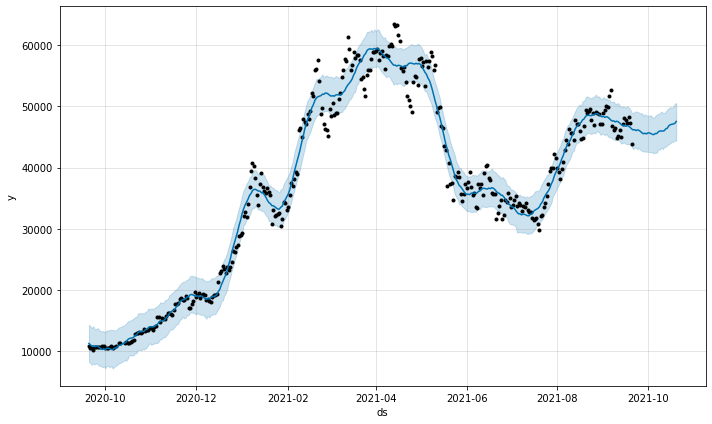

In [323]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

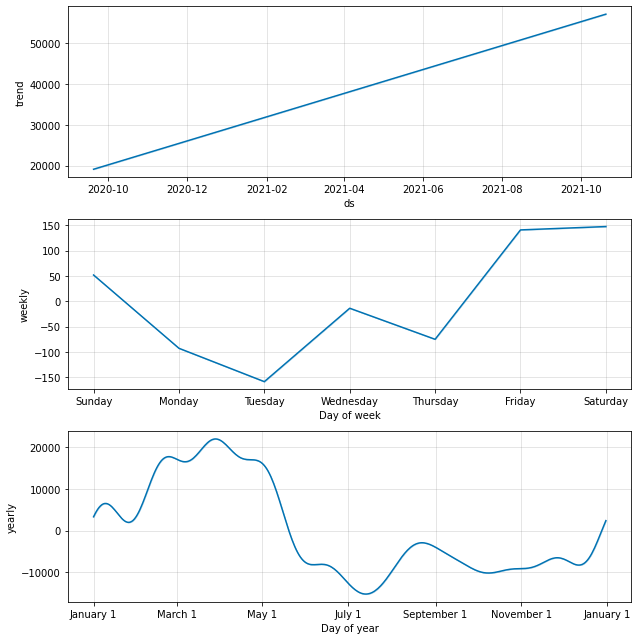

In [324]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [230]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>